Links to the datasets:

https://www.kaggle.com/saurabh00007/diabetescsv

https://www.kaggle.com/johnsmith88/heart-disease-dataset


1. Implement k-Nearest Neighbor algorithm for classifying a heart dataset.
2. Implement k-Means clustering algorithm on diabetic dataset.
3. Implement linear SVM with iris dataset. Consider two classes of Iris dataset which consists of three classes by removing one of the classes.

Use appropriate plots such as barplot,violinplot and also make a plot comparing the effecieny of the algorithms for different test cases

# 1.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [97]:
heart_data=pd.read_csv("heart.csv")


In [6]:
heart_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [27]:
print(heart_data['target'].unique())

[0 1]


In [28]:
print(heart_data['target'].value_counts())

1    526
0    499
Name: target, dtype: int64


# Visualisations


The number of people with heart diseases are more than the number without.

Text(0, 0.5, 'Count')

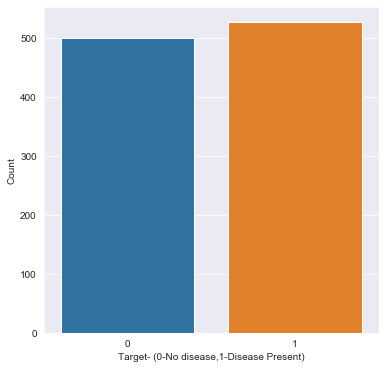

In [68]:
fig=plt.figure(figsize=(6,6))
sns.set_style('darkgrid')
sns.countplot(heart_data['target'])
plt.xlabel("Target- (0-No disease,1-Disease Present)")
plt.ylabel("Count")

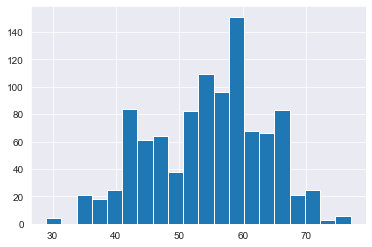

In [20]:
heart_data['age'].hist(bins=20)

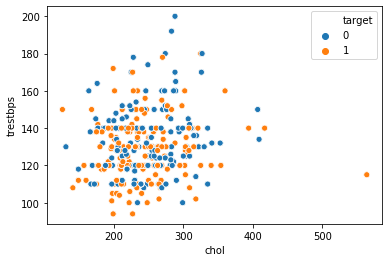

In [56]:
sns.scatterplot(heart_data['chol'],heart_data['trestbps'],hue=heart_data['target'])

The below graph showas that people with less cholestrol and higher heart rate were more prone to the disease.

Text(0, 0.5, 'Max Heart Rate')

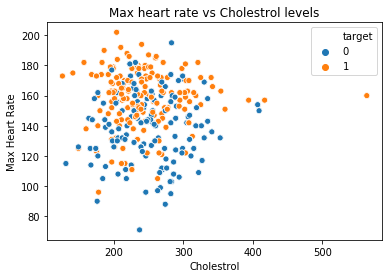

In [67]:
sns.scatterplot(heart_data['chol'],heart_data['thalach'],hue=heart_data['target'])
plt.title("Max heart rate vs Cholestrol levels")
plt.xlabel("Cholestrol")
plt.ylabel("Max Heart Rate")

Text(0, 0.5, 'BPS')

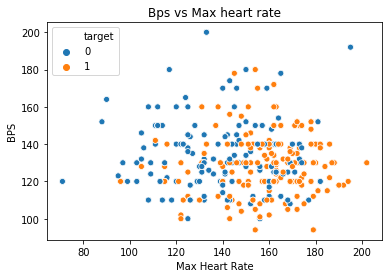

In [61]:
sns.scatterplot(heart_data['thalach'],heart_data['trestbps'],hue=heart_data['target'])
plt.title("Bps vs Max heart rate")
plt.xlabel("Max Heart Rate")
plt.ylabel("BPS")

# Graphs showing the presence of diseases among genders across different ages

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E4C411308>,
      dtype=object)

<Figure size 432x432 with 0 Axes>

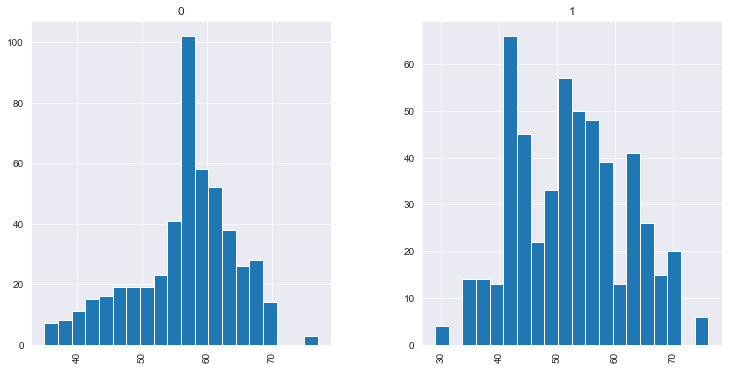

In [31]:
plt.figure(figsize=(6,6))
heart_data['age'].hist(by=heart_data['target'],bins=20,figsize=(12,6))

Generally more number of people in the age range of 40-70 are found to have a heart diesease. The number of people free of heart dieseases is found to be particluarly high in the age range of 65-70.

The below graphs clearly show that males are more free of heart diseases as compared to females. The number of females with heart disease is consciderably high.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E4CB433C8>,
      dtype=object)

<Figure size 432x432 with 0 Axes>

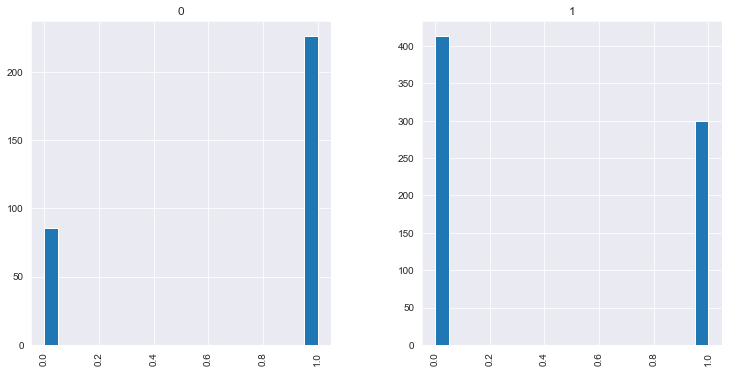

In [40]:
plt.figure(figsize=(6,6))
heart_data['target'].hist(by=heart_data['sex'],bins=20,figsize=(12,6))

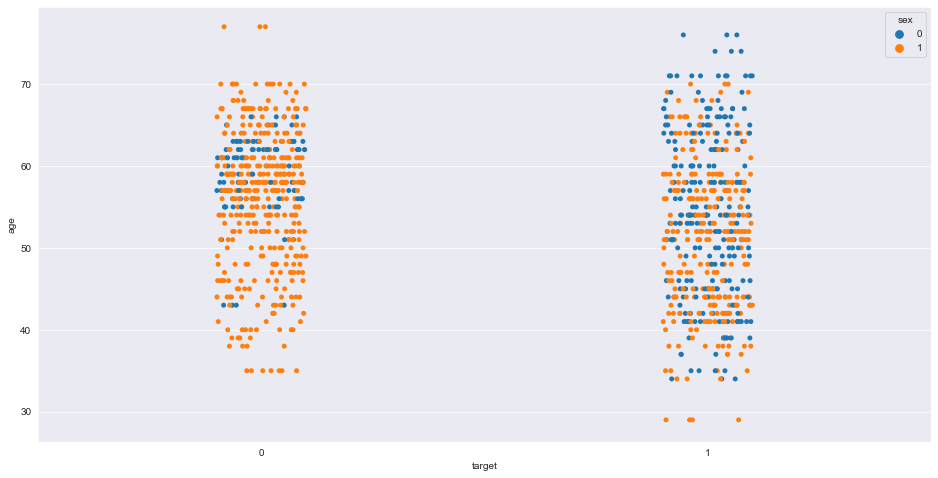

In [49]:
plt.figure(figsize=(16,8))
sns.stripplot(x=heart_data['target'],y=heart_data['age'],hue=heart_data['sex'],jitter=True)

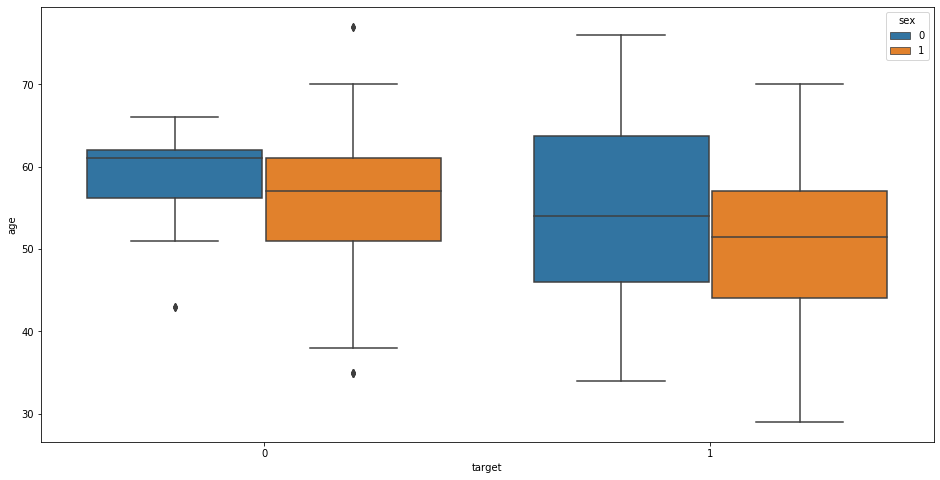

In [55]:
plt.figure(figsize=(16,8))
sns.boxplot(x=heart_data['target'],y=heart_data['age'],hue=heart_data['sex'])

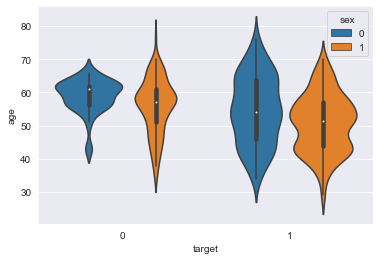

In [53]:
sns.violinplot(x=heart_data['target'],y=heart_data['age'],hue=heart_data['sex'])

# General Plots

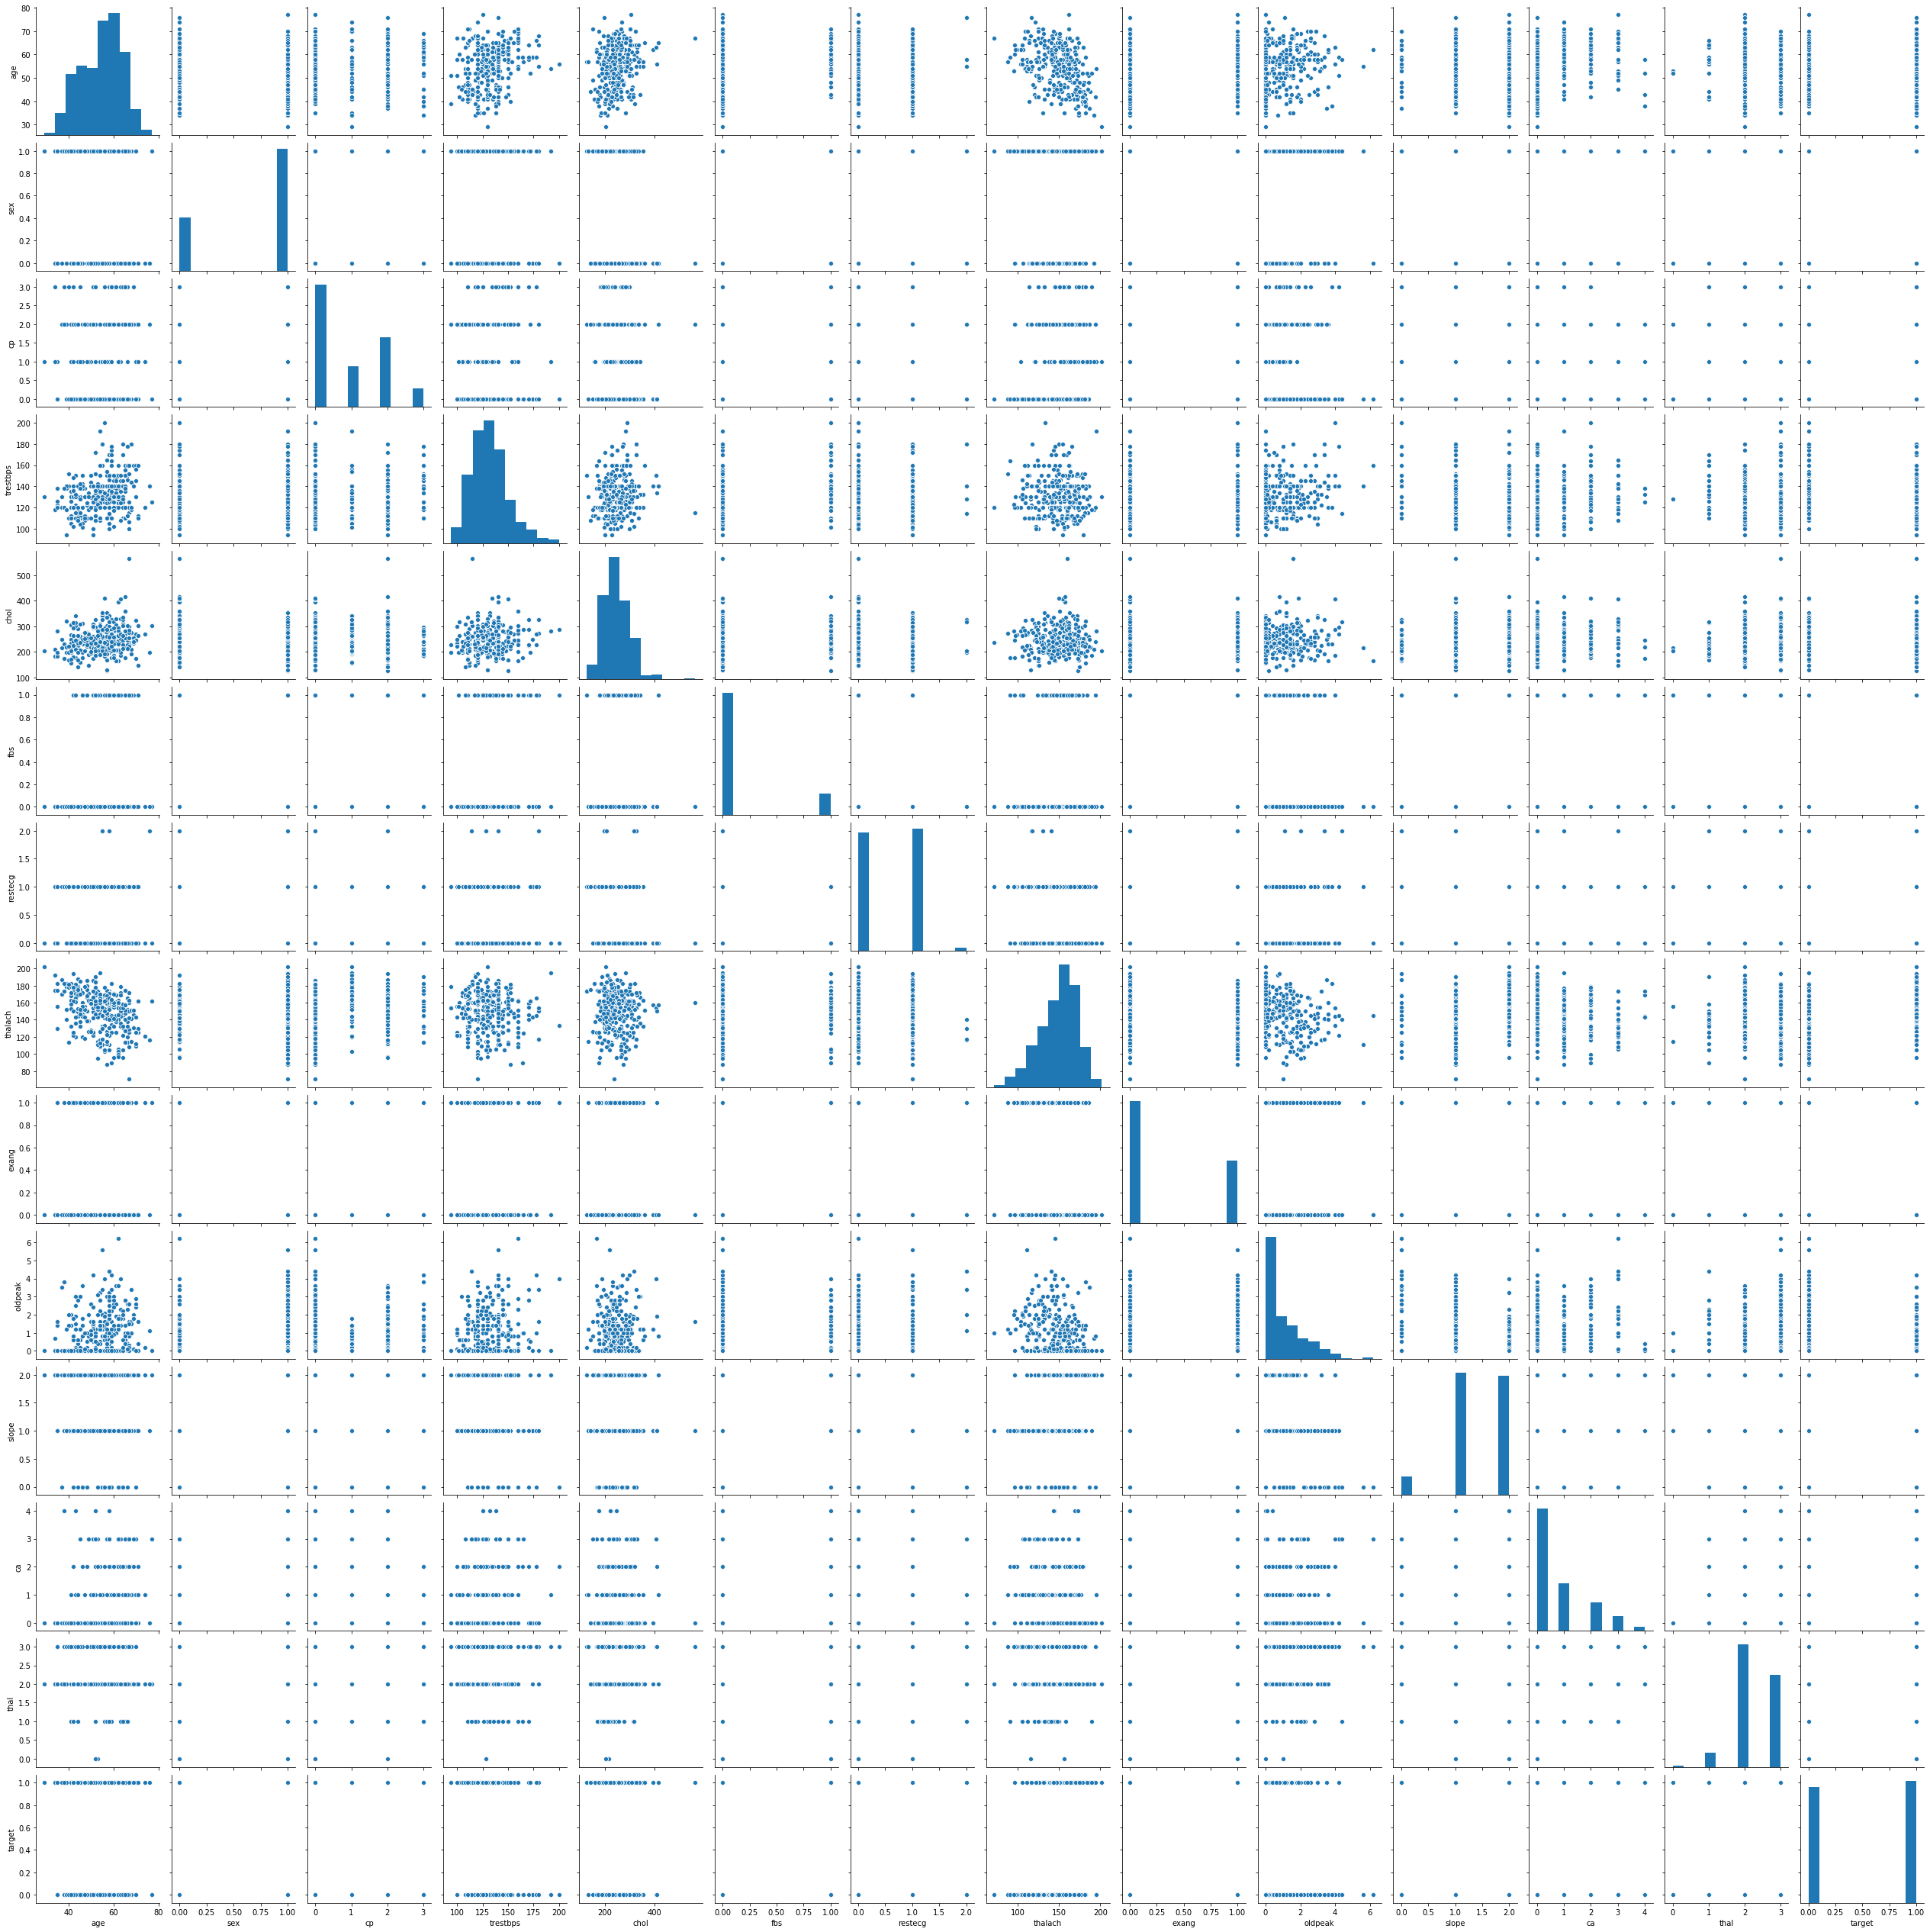

In [9]:
sns.pairplot(data=heart_data)

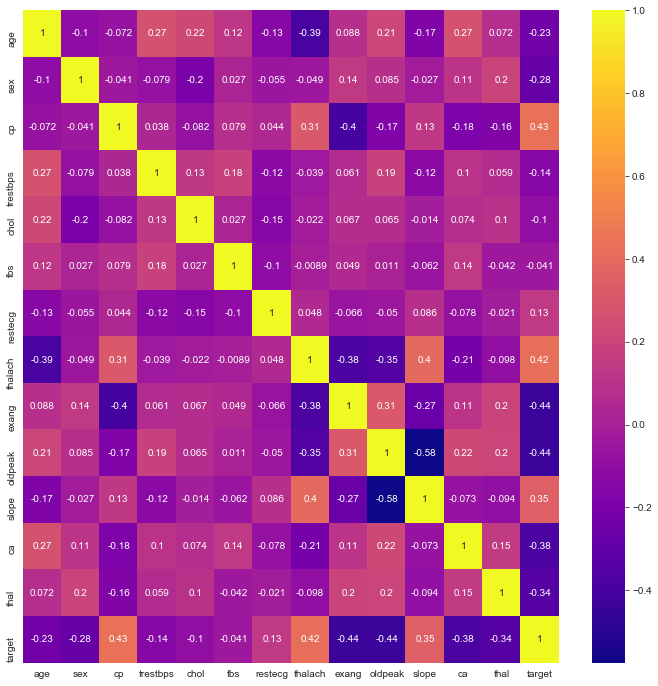

In [58]:
plt.figure(figsize=(12,12))
sns.heatmap(heart_data.corr(),cmap='plasma',annot=True)

# Making a Model

In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.preprocessing import StandardScaler

In [61]:
heart_data
# here the categorical variables to be encoded are 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
heart_data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [6]:
heart_data['restecg'].unique()

array([1, 0, 2], dtype=int64)

In [7]:
heart_data['slope'].unique()

array([2, 0, 1], dtype=int64)

In [8]:
heart_data['ca'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [9]:
heart_data['thal'].unique()

array([3, 2, 1, 0], dtype=int64)

In [10]:
#The above variables need to be encoded

In [98]:
cp=pd.get_dummies(heart_data['cp'],drop_first=True,prefix="cp")

In [99]:
cp.head(6)

,cp_1,cp_2,cp_3
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0


In [100]:
restecg=pd.get_dummies(heart_data['restecg'],drop_first=True,prefix="restecg")

In [101]:
restecg.head()

,restecg_1,restecg_2
0,1,0
1,0,0
2,1,0
3,1,0
4,1,0


In [102]:
slope=pd.get_dummies(heart_data['slope'],drop_first=True,prefix="slope")

In [103]:
slope.head()

,slope_1,slope_2
0,0,1
1,0,0
2,0,0
3,0,1
4,1,0


In [104]:
ca=pd.get_dummies(heart_data['ca'],drop_first=True,prefix="ca")

In [105]:
ca.head()

,ca_1,ca_2,ca_3,ca_4
0,0,1,0,0
1,0,0,0,0
2,0,0,0,0
3,1,0,0,0
4,0,0,1,0


In [106]:
thal=pd.get_dummies(heart_data['thal'],drop_first=True,prefix="thal")

In [107]:
thal.head()

,thal_1,thal_2,thal_3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0


In [108]:
heart_data.drop(['cp','thal','ca','slope','restecg'],axis=1,inplace=True)

In [109]:
heart_data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target
0,52,1,125,212,0,168,0,1.0,0
1,53,1,140,203,1,155,1,3.1,0
2,70,1,145,174,0,125,1,2.6,0
3,61,1,148,203,0,161,0,0.0,0
4,62,0,138,294,1,106,0,1.9,0


In [110]:
heart_data=pd.concat([heart_data,cp,restecg,slope,ca,thal],axis=1)

In [111]:
y=heart_data['target']

In [112]:
heart_data.drop('target',axis=1,inplace=True)

In [113]:
heart_data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1,cp_2,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,0,0,0,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,1,106,0,1.9,0,0,...,0,1,0,0,0,1,0,0,1,0


In [101]:
sc=StandardScaler()

In [114]:
from sklearn.model_selection import train_test_split

In [30]:
heart_data.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2',
       'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [119]:
X_train,X_test,y_train,y_test=train_test_split(heart_data,y,test_size=0.3)

In [40]:
knn=KNeighborsClassifier(n_neighbors=3)

In [41]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [42]:
y_pred=knn.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(confusion_matrix(y_test,y_pred))

[[137  24]
 [ 19 128]]


In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       161
           1       0.84      0.87      0.86       147

    accuracy                           0.86       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.86      0.86      0.86       308



# Tuning the model

In [70]:
arr=list(range(1,60))
error=[]
from sklearn.model_selection import cross_val_score

In [47]:
for i in arr:
    knn=KNeighborsClassifier(n_neighbors=i)
    scores=cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
    error.append(scores.mean())

In [48]:
mse=[1-x for x in error]

Text(0, 0.5, 'Misclassification Error Rates')

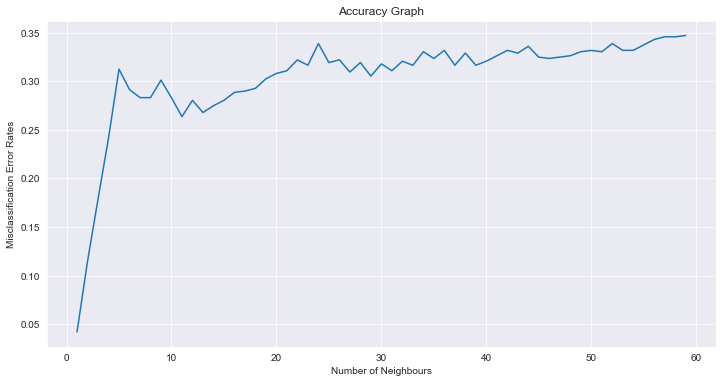

In [69]:
plt.figure(figsize=(12,6))
plt.plot(arr,mse)
plt.title('Accuracy Graph')
plt.xlabel("Number of Neighbours")
plt.ylabel("Misclassification Error Rates")

The above diagram shows that the best results are obtained for n_neighbours=1

In [137]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[140  10]
 [  3 155]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       150
           1       0.94      0.98      0.96       158

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



In [138]:
score=cross_val_score(KNeighborsClassifier(1),X_test,y_test,cv=10,scoring='accuracy')

In [139]:
score

array([0.77419355, 0.74193548, 0.77419355, 0.77419355, 0.74193548,
       0.80645161, 0.64516129, 0.83870968, 0.8       , 0.86666667])

In [140]:
score.std()

0.057536427707619686

In [141]:
score.mean()

0.7763440860215054

# 2

In [5]:
diabetes=pd.read_csv('diabetes.csv')

In [85]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Understanding the data

1.The most useful features from the above tables will be 'Glucose' ,'Insulin','DiabetesPedigreeFunction'
2.They are the main resaons and DiabetesPedigreeFunction is just a mesure of the chances of diabetes based on family
  history

In [86]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [87]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [90]:
diabetes['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

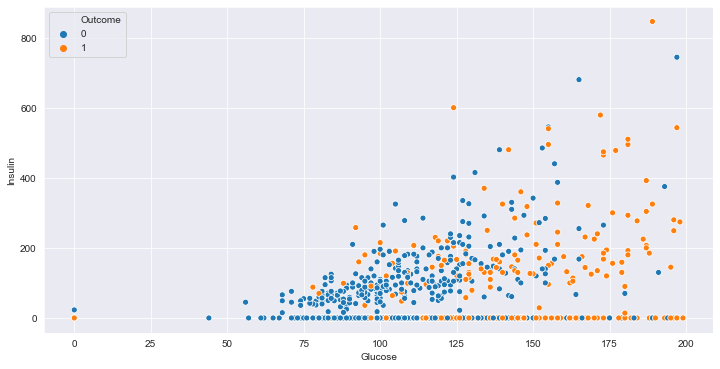

In [98]:
plt.figure(figsize=(12,6))
sns.scatterplot(diabetes['Glucose'],diabetes['Insulin'],hue=diabetes['Outcome'])

In [97]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

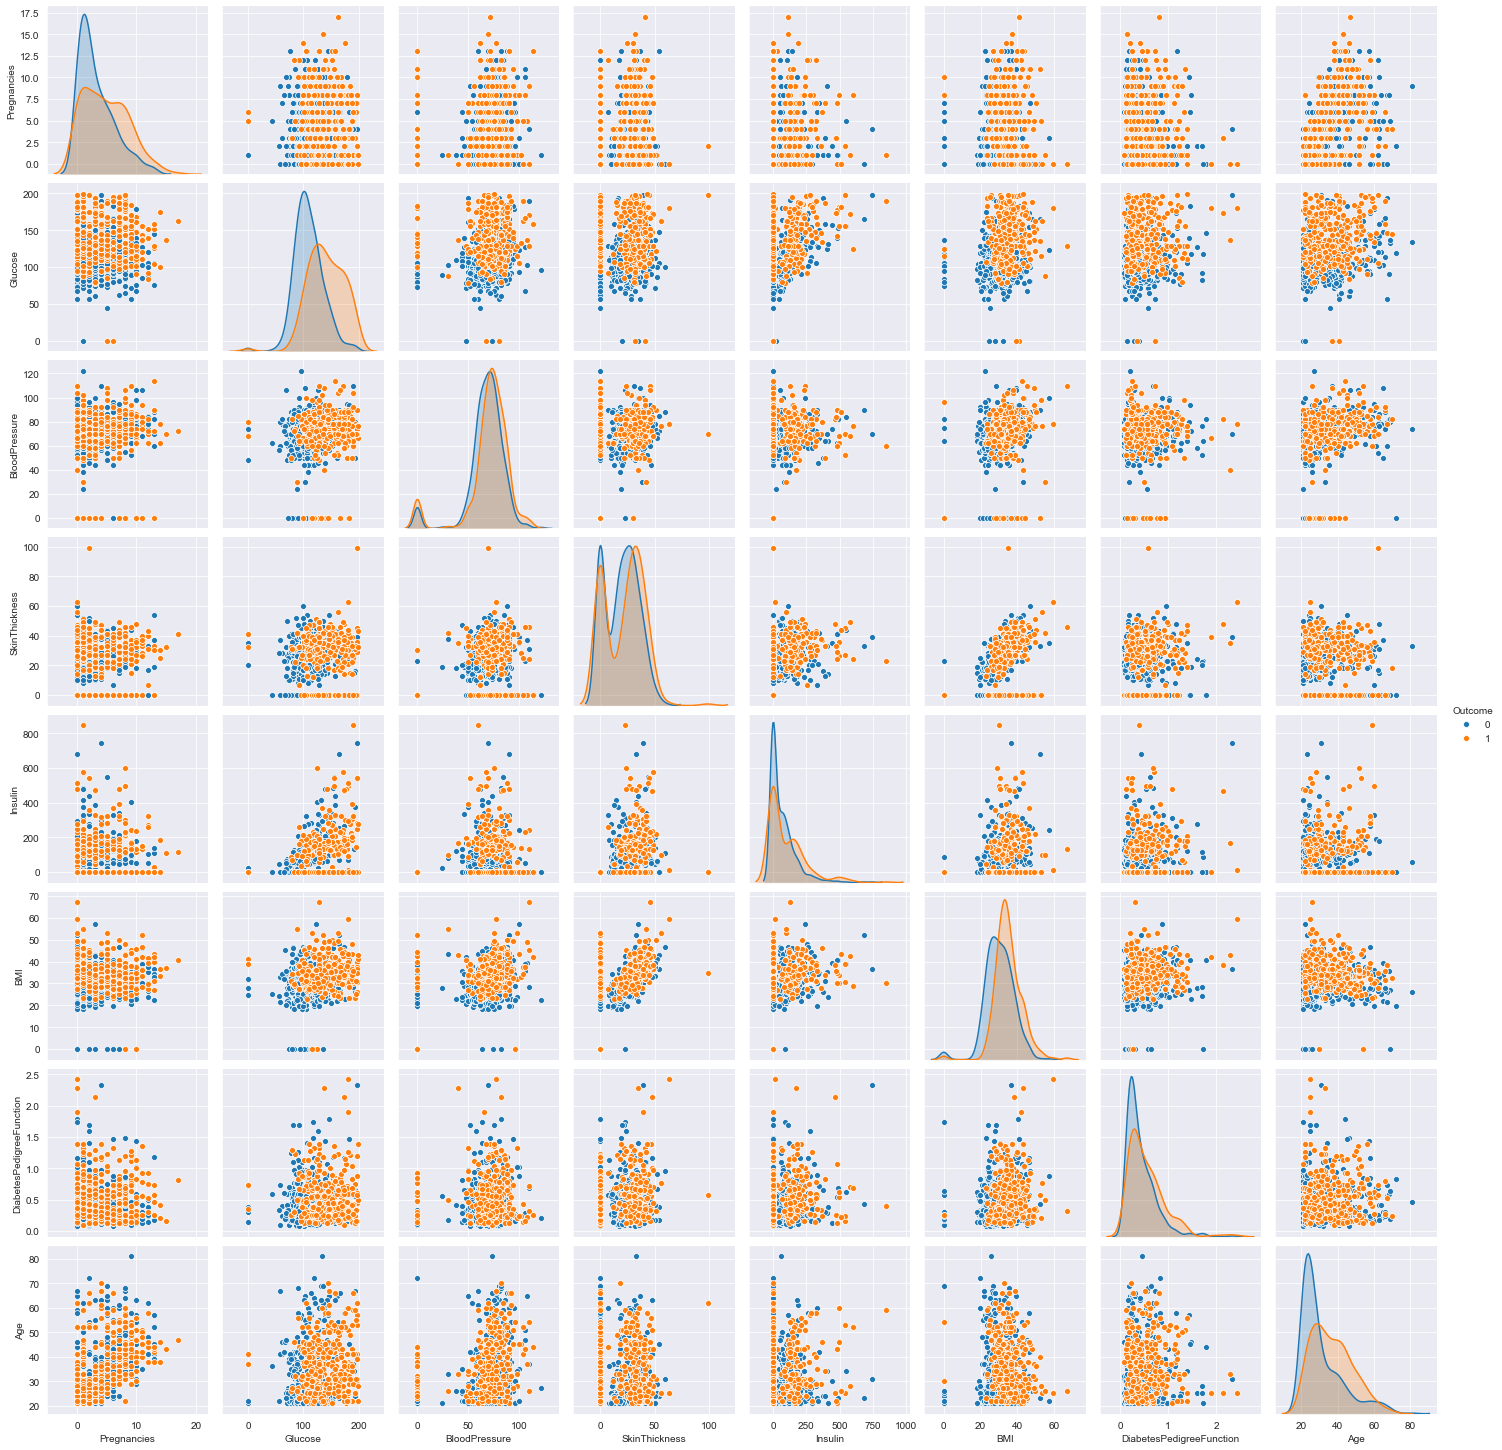

In [105]:
sns.pairplot(diabetes,hue='Outcome')

<Figure size 864x432 with 0 Axes>

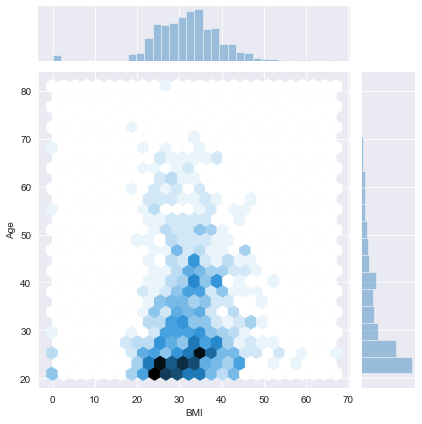

In [4]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.jointplot(diabetes['BMI'],diabetes['Age'],kind='hex')

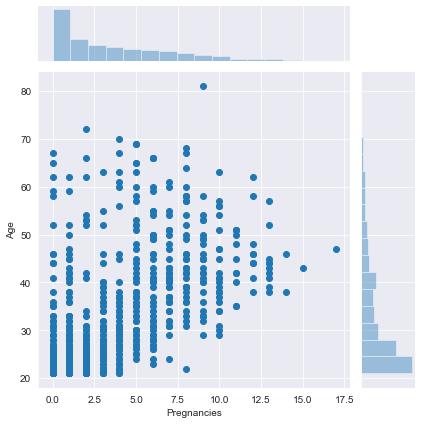

In [11]:
sns.jointplot(diabetes['Pregnancies'],diabetes['Age'],)

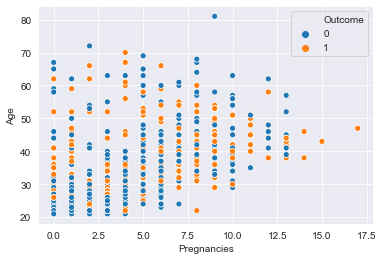

In [12]:
sns.scatterplot(diabetes['Pregnancies'],diabetes['Age'],hue=diabetes['Outcome'])

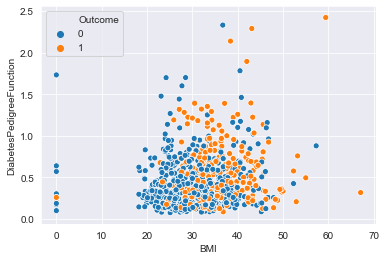

In [14]:
sns.scatterplot(diabetes['BMI'],diabetes['DiabetesPedigreeFunction'],hue=diabetes['Outcome'])

## Unsupervised Learning

In [25]:
from sklearn.cluster import KMeans

In [26]:
kmc=KMeans(n_clusters=2,)

In [27]:
kmc.fit(diabetes.drop('Outcome',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
kmc.cluster_centers_

array([[  3.72159091, 140.82954545,  72.65909091,  30.98863636,
        240.93181818,  34.66647727,   0.54777841,  33.65909091],
       [  3.88054608, 114.47440273,  67.97440273,  17.14334471,
         29.43174061,  31.02969283,   0.43631741,  33.13651877]])

In [29]:
kmc.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,

## Predicted Division

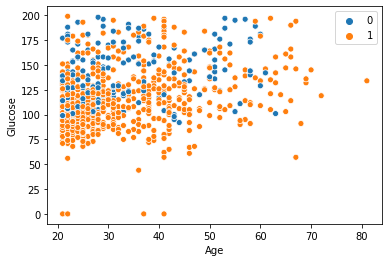

In [30]:
sns.scatterplot(diabetes['Age'],diabetes['Glucose'],hue=kmc.labels_,palette=['C0','C1'])

## Actual Division

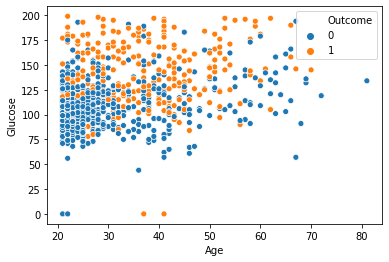

In [31]:
sns.scatterplot(diabetes['Age'],diabetes['Glucose'],hue=diabetes['Outcome'],palette=['C0','C1'])

In [32]:
print(classification_report(diabetes['Outcome'],kmc.labels_))

              precision    recall  f1-score   support

           0       0.49      0.17      0.26       499
           1       0.30      0.66      0.41       263

    accuracy                           0.34       762
   macro avg       0.40      0.42      0.33       762
weighted avg       0.43      0.34      0.31       762



## Improving the model

Trying To Remove The Outlier may improve the accuracy.

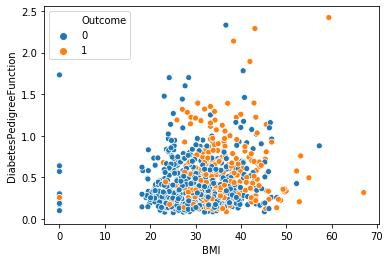

In [16]:
sns.scatterplot(diabetes['BMI'],diabetes['DiabetesPedigreeFunction'],hue=diabetes['Outcome'])

In [26]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
#Removing rows with pedigree function>2 and BMI>60
New=(diabetes['DiabetesPedigreeFunction']>2) | (diabetes['BMI']>60)|(diabetes['Pregnancies']==17)
diabetes.drop(diabetes[New].index,axis=0,inplace=True)

In [18]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               762 non-null    int64  
 1   Glucose                   762 non-null    int64  
 2   BloodPressure             762 non-null    int64  
 3   SkinThickness             762 non-null    int64  
 4   Insulin                   762 non-null    int64  
 5   BMI                       762 non-null    float64
 6   DiabetesPedigreeFunction  762 non-null    float64
 7   Age                       762 non-null    int64  
 8   Outcome                   762 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 59.5 KB


In [19]:
kmc=KMeans(n_clusters=2,)

In [20]:
kmc.fit(diabetes.drop('Outcome',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

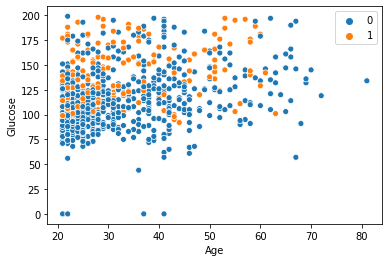

In [21]:
sns.scatterplot(diabetes['Age'],diabetes['Glucose'],hue=kmc.labels_,palette=['C0','C1'])

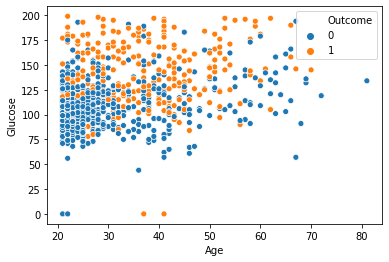

In [22]:
sns.scatterplot(diabetes['Age'],diabetes['Glucose'],hue=diabetes['Outcome'],palette=['C0','C1'])

### Even Though Unsuoervised Learning the Accuracy can be checked by using the Outcome Table of Diabetes dataset

In [24]:
print(classification_report(diabetes['Outcome'],kmc.labels_))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       499
           1       0.51      0.34      0.41       263

    accuracy                           0.66       762
   macro avg       0.60      0.58      0.58       762
weighted avg       0.63      0.66      0.64       762



## Max Score - 63%

# 3

In [5]:
iris=sns.load_dataset('iris')

In [65]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [66]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [67]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [68]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Conscidering Only versicolor and virginica species

In [6]:
iris.drop(iris[iris['species']=='setosa'].index,axis=0,inplace=True)

In [7]:
iris['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

In [93]:
iris.shape

(100, 5)

#### Encoding species into a new array

In [8]:
spec=pd.get_dummies(iris['species'],drop_first=True)

In [131]:
spec

,virginica
50,0
51,0
52,0
53,0
54,0
...,...
145,1
146,1
147,1
148,1


In [9]:
iris.drop('species',axis=1,inplace=True)

In [10]:
iris=pd.concat([iris,spec],axis=1)

iris

#### 0-Versicolor , 1- Virginica

In [81]:
iris.drop('species',axis=1,inplace=True)

In [13]:
iris['virginica'].value_counts()

1    50
0    50
Name: virginica, dtype: int64

###  Visualisation

The graphs below between sepal_length,petal_width show a clear distinction between the two species which can be easily understood by the linear SVM

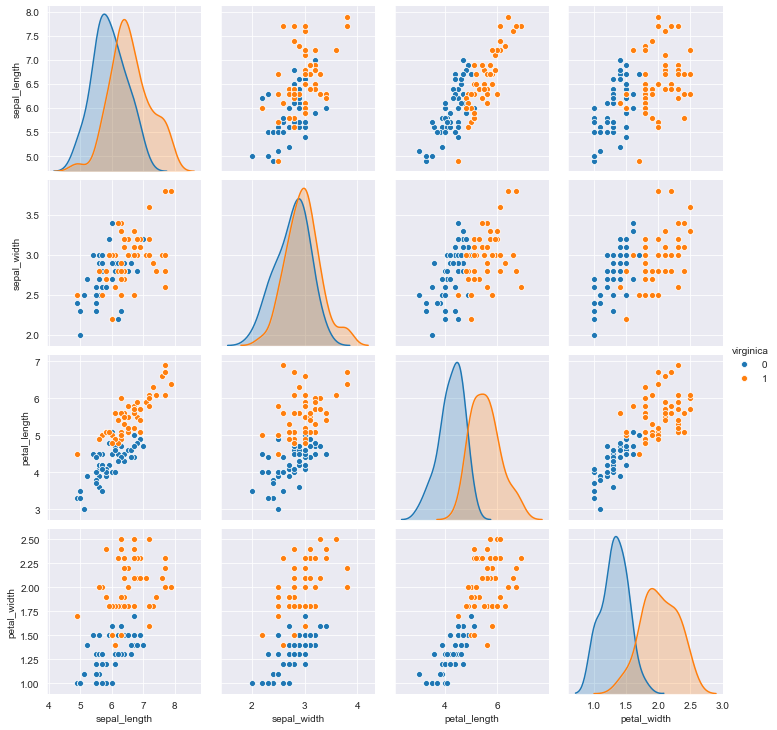

In [135]:
sns.pairplot(iris,hue='virginica')

## Making the Model

In [19]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

In [20]:
svc=LinearSVC()

In [21]:
from sklearn.model_selection import train_test_split

In [34]:
X=iris.drop('virginica',axis=1)
y=iris['virginica']

In [22]:
X_train,X_test,y_train,y_test=train_test_split(iris.drop('virginica',axis=1),iris['virginica'],test_size=0.3,random_state=42)

In [26]:
print(y_train.value_counts())
print(y_test.value_counts())

1    37
0    33
Name: virginica, dtype: int64
0    17
1    13
Name: virginica, dtype: int64


In [27]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [28]:
svc.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [29]:
y_pred=svc.predict(X_test)

In [30]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[14  3]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.81      1.00      0.90        13

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92      0.90      0.90        30



In [31]:
from sklearn.model_selection import KFold

In [51]:
kf=KFold(n_splits=5,shuffle=True)
errors=[]


In [55]:
from sklearn.model_selection import cross_val_score

In [57]:
mod=LinearSVC()

In [58]:
scores=cross_val_score(mod,X,y,cv=10)

E:\Python\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Python\lib\site-packages\sklearn\svm\_base.py:9

In [67]:
scores

array([1. , 0.9, 1. , 1. , 0.8, 1. , 0.9, 1. , 1. , 1. ])

In [69]:
scores.mean()

0.96

In [70]:
scores.std()

0.06633249580710798

# Comparing efficiency between the cases

In [2]:
x=["Heart_KNN","Diabetes_KMeans","Iris_SVC"]

In [3]:
y=[96,63,92]

Text(0.5, 1.0, 'Accuracy vs Dataset_AlgoUsed')

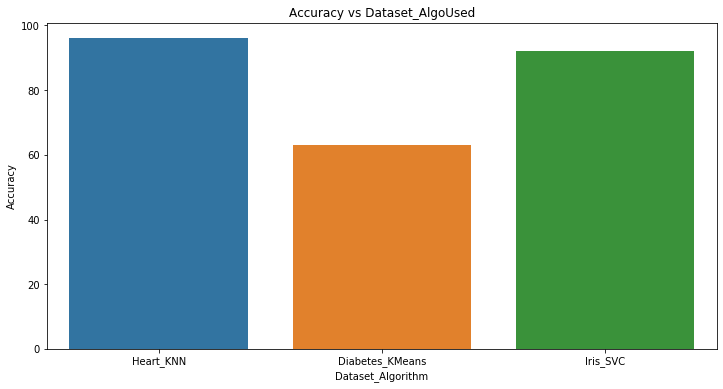

In [4]:
plt.figure(figsize=(12,6))
sns.barplot(x,y)
plt.ylabel("Accuracy")
plt.xlabel("Dataset_Algorithm")
plt.title('Accuracy vs Dataset_AlgoUsed')